In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
start_time = time.time()

In [218]:
df = pd.read_excel('D:/Prog/ML/datasets/scoring/data.xlsx')

In [219]:
df.head()

,loan_id,target,c1,c2,c3,c4,c5,c6,c7,c8,f1,f2,f3
0,1,0,NaN,100.987693,0.244307,NaN,292.990245,-7.608697,29.799024,0.000254,cat3,cat2,cat1
1,2,1,-3.491385,69.729741,1.203940,NaN,300.505830,-3.341621,30.550583,0.000343,cat4,cat2,cat1
2,3,1,-13.319012,171.782722,0.643540,NaN,324.569894,-6.020134,32.956989,0.000113,NaN,NaN,cat2
3,4,0,NaN,97.932134,-0.419284,0.000591,189.873032,7.099042,19.487303,0.000447,cat3,cat3,cat2
4,5,1,-21.868370,115.826067,0.533246,0.004592,441.957839,NaN,NaN,0.002762,NaN,cat1,cat4


In [220]:
df.describe()

,loan_id,target,c1,c2,c3,c4,c5,c6,c7,c8
count,1000.000000,1000.000000,895.000000,898.000000,898.000000,8.980000e+02,896.000000,891.000000,904.000000,891.000000
mean,500.500000,0.505000,-19.121633,104.545624,-2.157325,7.191213e-01,312.715550,-1.107039,31.696265,0.009874
std,288.819436,0.500225,6.529655,28.405828,64.948341,1.818080e+01,93.347974,4.190027,9.425144,0.030112
min,1.000000,0.000000,-41.035358,0.000000,-1930.139580,1.991749e-09,-5.000000,-15.241649,0.000000,0.000003
25%,250.750000,0.000000,-23.506621,85.227066,-0.574418,7.641420e-05,253.703807,-3.886878,25.426370,0.000930
50%,500.500000,1.000000,-18.945191,103.142654,0.322452,8.525977e-04,309.875590,-1.078512,31.633251,0.002697
75%,750.250000,1.000000,-14.771743,123.320364,0.729773,1.227027e-02,374.749219,1.788421,37.974922,0.008418
max,1000.000000,1.000000,0.000000,188.117528,85.586040,5.440642e+02,666.955488,13.851844,67.195549,0.608675


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
loan_id    1000 non-null int64
target     1000 non-null int64
c1         895 non-null float64
c2         898 non-null float64
c3         898 non-null float64
c4         898 non-null float64
c5         896 non-null float64
c6         891 non-null float64
c7         904 non-null float64
c8         891 non-null float64
f1         895 non-null object
f2         905 non-null object
f3         894 non-null object
dtypes: float64(8), int64(2), object(3)
memory usage: 101.6+ KB


In [222]:
for col in df.columns:
    values = set(df[col])
    print(f'{col} has {len(values)} values')

loan_id has 1000 values
target has 2 values
c1 has 1000 values
c2 has 1000 values
c3 has 1000 values
c4 has 1000 values
c5 has 1000 values
c6 has 1000 values
c7 has 1000 values
c8 has 1000 values
f1 has 5 values
f2 has 4 values
f3 has 5 values


So we can see, that c1-c8 has continous values and f1-f3 has categorical values

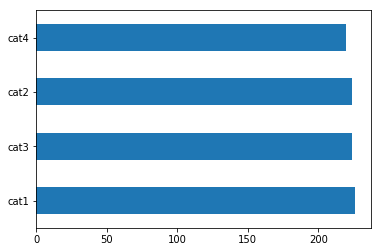

In [223]:
df.iloc[:, -1].value_counts().plot.barh();

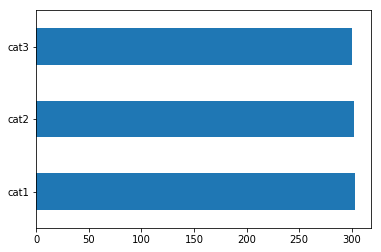

In [224]:
df.iloc[:, -2].value_counts().plot.barh();

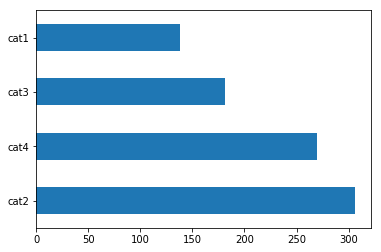

In [225]:
df.iloc[:, -3].value_counts().plot.barh();

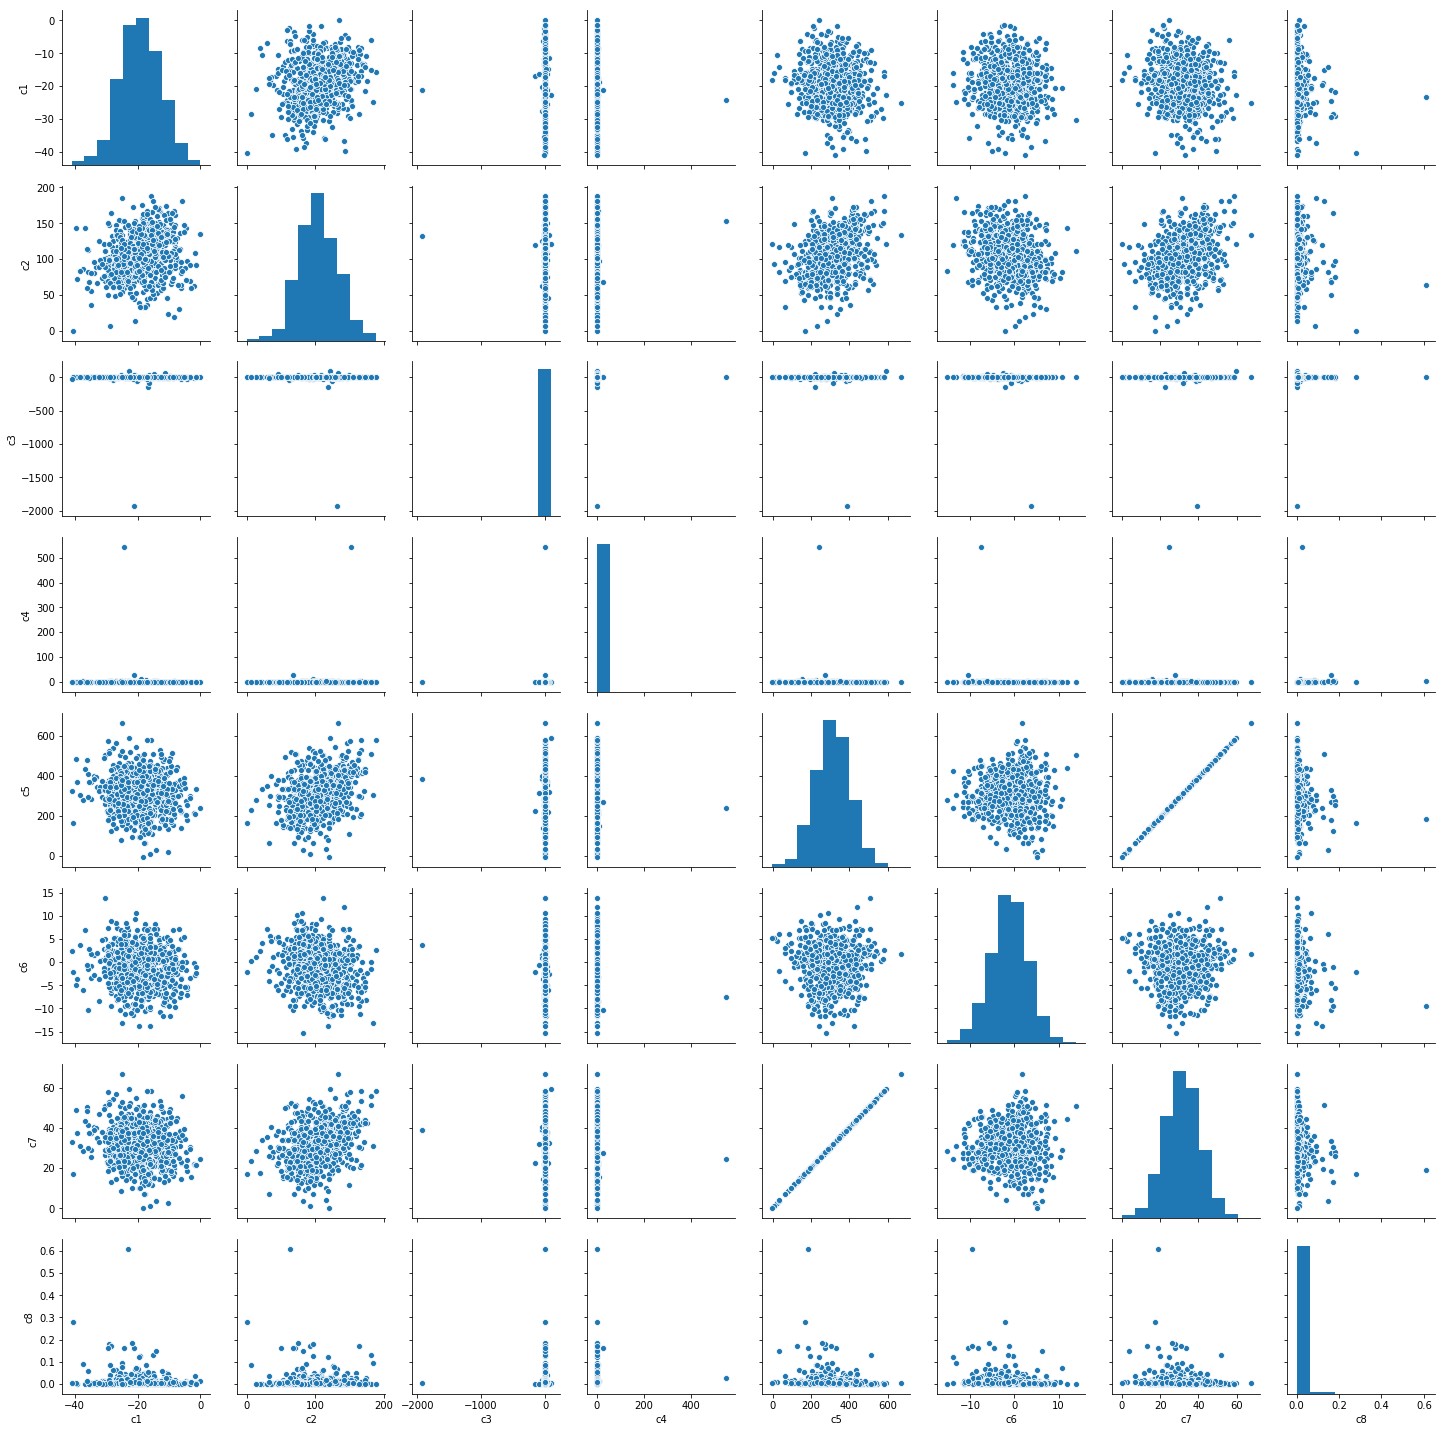

In [226]:
sns_plot = sns.pairplot(df.iloc[:,2:-3])

How we can see c5 and c7 is very correlated. Also we have some outliers at c8, c4 and c3. Let's see Pearson correlation and drop out outliers.

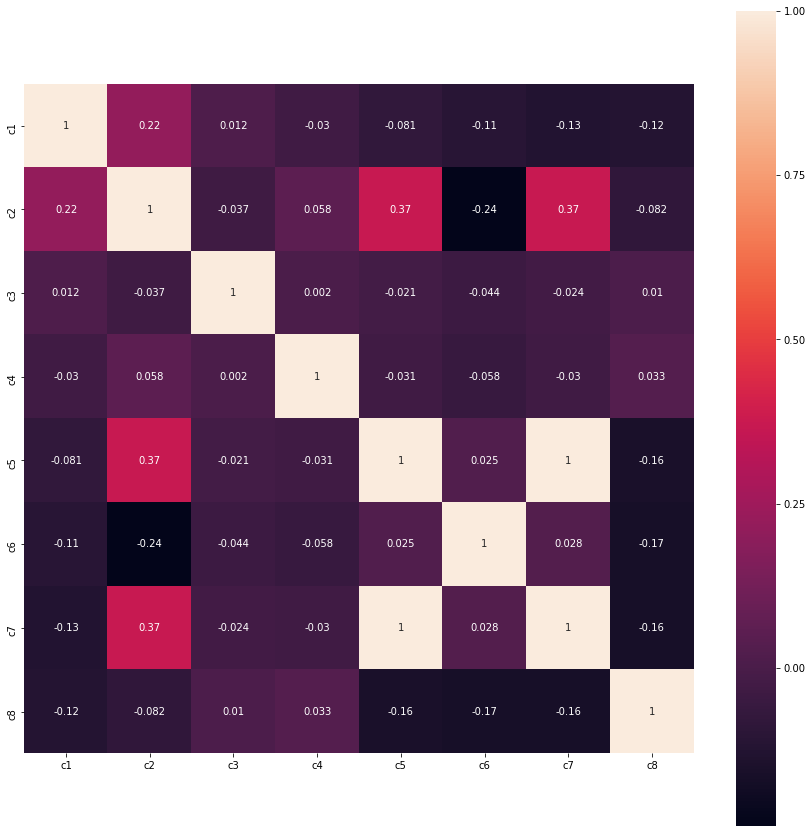

In [227]:
corr = df.iloc[:, 2:-3].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, square=True)

So, really c5 and c7 has big correlation. Let's drop out c7, because of his slightly bigger correlation to another features.

In [228]:
df = df.drop('c7',axis=1)

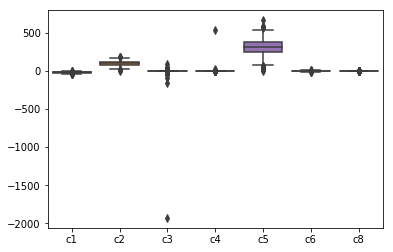

In [229]:
#Let's drop out outliers at c3,c4 and c8
sns.boxplot(data=df.iloc[:,2:-3])

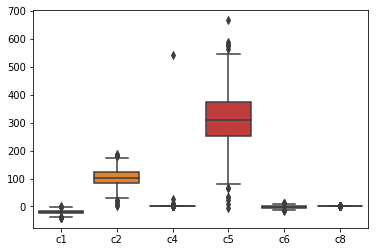

In [230]:
sns.boxplot(data=df.iloc[:,2:-3].drop('c3',axis=1))

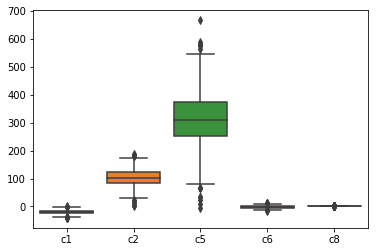

In [231]:
sns.boxplot(data=df.iloc[:,2:-3].drop(['c3','c4'],axis=1))

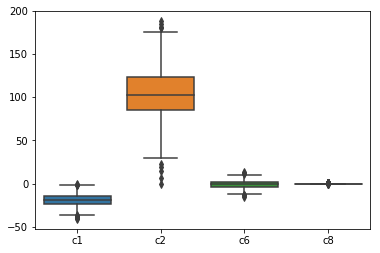

In [232]:
sns.boxplot(data=df.iloc[:,2:-3].drop(['c3','c4','c5'],axis=1))

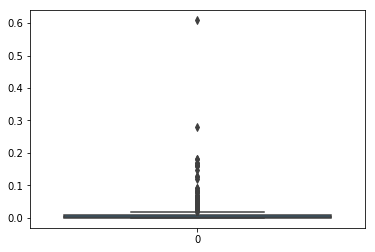

In [233]:
sns.boxplot(data=df['c8'])

So we can see, that we was right about outliers at c3,c3,c8. Let's drop them. We can do it even analytically. But before we must to fill nan.

We can swap them into median or mean. Both of these variants we must to try.

Also, we must to use OneHotEncoding or Label Encoding for f1-f3. Let's use OneHotEncoding, just because i like it more)

In [188]:
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df.iloc[:,-3:].fillna('cat0')))
encoded_categorical_columns.head()
df = df.iloc[:,:-3]
df = pd.concat([df, encoded_categorical_columns], axis=1)

In [189]:
imp = SimpleImputer(strategy='mean')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [190]:
df = df[(df['c8']<0.5) & (df['c3']>-1000) & (df['c4']<400)]
#also we can drop column 'loan_id'
df = df.drop('loan_id',axis=1)

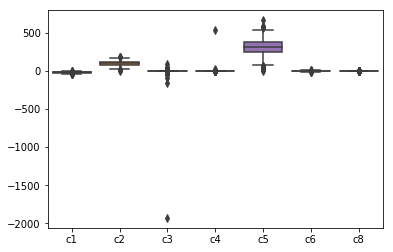

In [236]:
sns.boxplot(data=df.iloc[:,2:9])

In [192]:
target = df.pop('target')

Lets create zoo of models and try to get some score

In [193]:
def get_accuracy_f1(model, X_train, y_train):
    scores_acc = cross_val_score(model, X_train, y_train, cv=6).mean()
    scores_f1 = cross_val_score(model, X_train, y_train, cv=6, scoring='f1_macro').mean()
    return [scores_acc, scores_f1]

In [194]:
Percept = Perceptron()
svm = LinearSVC()
svm_rbf = SVC(kernel = 'rbf')
svm_poly = SVC(kernel = 'poly')
svm_sigmoid = SVC(kernel ='sigmoid')
rand_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
SGDC = SGDClassifier()
log_reg = LogisticRegression()
tree = DecisionTreeClassifier()
k_neighb = KNeighborsClassifier()
mas_of_result = list()
zoo = [
    (Percept, 'Perceptron'),
    (svm, 'LinearSVC'),
    (rand_forest, 'RandomForestClassifier'), 
    (adaboost, 'AdaBoostClassifier'), 
    (grad_boost, 'GradientBoostingClassifier'),
    (SGDC, 'SGDClassifier'),
    (log_reg, 'LogisticRegression'),
    (tree, 'DecisionTreeClassifier'),
    (k_neighb, 'KNeighborsClassifier')
    ]
for model, name in zoo:
    start_model_time = time.time()
    mas_of_result.append(get_accuracy_f1(model, df, target))
    print(f"{name}      {time.time() - start_model_time}s seconds ---")

Perceptron      0.0969381332397461s seconds ---
LinearSVC      1.2917335033416748s seconds ---
RandomForestClassifier      0.6743330955505371s seconds ---
AdaBoostClassifier      1.9585695266723633s seconds ---
GradientBoostingClassifier      2.9641168117523193s seconds ---
SGDClassifier      0.09294319152832031s seconds ---
LogisticRegression      0.16489720344543457s seconds ---
DecisionTreeClassifier      0.19188213348388672s seconds ---
KNeighborsClassifier      0.24785327911376953s seconds ---


In [195]:
for i in range(len(mas_of_result)):
    print(f'Model:{zoo[i][1]}. Accuracy={mas_of_result[i][0].mean()}. F1={mas_of_result[i][1].mean()}')

Model:Perceptron. Accuracy=0.5636319547833868. F1=0.46720048904649647
Model:LinearSVC. Accuracy=0.6208013327124502. F1=0.5902598810159505
Model:RandomForestClassifier. Accuracy=0.7712374447891367. F1=0.7581254806110573
Model:AdaBoostClassifier. Accuracy=0.7511805888041369. F1=0.7509425098074702
Model:GradientBoostingClassifier. Accuracy=0.8284432595196609. F1=0.82827626326553
Model:SGDClassifier. Accuracy=0.6148253329048365. F1=0.4858261043791319
Model:LogisticRegression. Accuracy=0.7201039687692887. F1=0.7196446665590162
Model:DecisionTreeClassifier. Accuracy=0.7180597184601224. F1=0.7176948266200144
Model:KNeighborsClassifier. Accuracy=0.6198279599982218. F1=0.6192101325874776


So, how we can see. The best score give us GradientBoostingClassifier. Unfortunatelly, he has the biigest time of fitting, and that's a pity. But also we can use RandomForestClassifier and AdaBoostClassifier.

So now let's test another strategy of imputing missing values and preparing categorical features.

In [196]:
df = pd.read_excel('D:/Prog/ML/datasets/scoring/data.xlsx')

df = df.drop('c7',axis=1)

label_encoder = LabelEncoder()
categorical_columns = ['f1','f2','f3']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].fillna('cat0'))
df.head()

imp = SimpleImputer(strategy='mean')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

df = df[(df['c8']<0.5) & (df['c3']>-1000) & (df['c4']<400)]
df = df.drop('loan_id',axis=1)

target = df.pop('target')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 11 columns):
c1    997 non-null float64
c2    997 non-null float64
c3    997 non-null float64
c4    997 non-null float64
c5    997 non-null float64
c6    997 non-null float64
c7    997 non-null float64
c8    997 non-null float64
f1    997 non-null float64
f2    997 non-null float64
f3    997 non-null float64
dtypes: float64(11)
memory usage: 93.5 KB


In [198]:
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,f1,f2,f3
0,-19.121633,100.987693,0.244307,0.719121,292.990245,-7.608697,29.799024,0.000254,3.0,2.0,1.0
1,-3.491385,69.729741,1.203940,0.719121,300.505830,-3.341621,30.550583,0.000343,4.0,2.0,1.0
2,-13.319012,171.782722,0.643540,0.719121,324.569894,-6.020134,32.956989,0.000113,0.0,0.0,2.0
3,-19.121633,97.932134,-0.419284,0.000591,189.873032,7.099042,19.487303,0.000447,3.0,3.0,2.0
4,-21.868370,115.826067,0.533246,0.004592,441.957839,-1.107039,31.696265,0.002762,0.0,1.0,4.0


In [199]:
test_mas_of_result = list()
for model, name in zoo:
    start_model_time = time.time()
    test_mas_of_result.append(get_accuracy_f1(model, df, target))
    print(f"{name}      {time.time() - start_model_time}s seconds ---")

Perceptron      0.10068774223327637s seconds ---
LinearSVC      1.1363952159881592s seconds ---
RandomForestClassifier      0.4517252445220947s seconds ---
AdaBoostClassifier      2.0497326850891113s seconds ---
GradientBoostingClassifier      2.414505958557129s seconds ---
SGDClassifier      0.07695460319519043s seconds ---
LogisticRegression      0.16489577293395996s seconds ---
DecisionTreeClassifier      0.14790749549865723s seconds ---
KNeighborsClassifier      0.2218635082244873s seconds ---


In [200]:
diff_mas_of_result = np.array(test_mas_of_result) - np.array(mas_of_result)
for i in range(len(diff_mas_of_result)):
    print(f'Model:{zoo[i][1]}. Accuracy={diff_mas_of_result[i][0].mean()}. F1={diff_mas_of_result[i][1].mean()}')

Model:Perceptron. Accuracy=-0.00492931624884585. F1=-0.003466093277771032
Model:LinearSVC. Accuracy=-0.04213876008479567. F1=-0.061447502787168484
Model:RandomForestClassifier. Accuracy=-0.001978117514514599. F1=0.007926472741268342
Model:AdaBoostClassifier. Accuracy=0.001094707263093464. F1=0.000994659319946134
Model:GradientBoostingClassifier. Accuracy=-0.01004639133562002. F1=-0.010004479399523869
Model:SGDClassifier. Accuracy=-0.04921504198612636. F1=-0.05645225024241046
Model:LogisticRegression. Accuracy=-0.011056273724912358. F1=-0.011193322988922616
Model:DecisionTreeClassifier. Accuracy=-0.034027745895576444. F1=-0.020804433923982457
Model:KNeighborsClassifier. Accuracy=2.4048288964406694e-05. F1=-1.7666652993741927e-05


How we can see, the scores has not changed much, but the learning time has decreased. Set Label Encoder for categorical features.

In [201]:
mas_of_result = test_mas_of_result

In [238]:
df = pd.read_excel('D:/Prog/ML/datasets/scoring/data.xlsx')

df = df.drop('c7',axis=1)

label_encoder = LabelEncoder()
categorical_columns = ['f1','f2','f3']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].fillna('cat0'))
df.head()

imp = SimpleImputer(strategy='median')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

df = df[(df['c8']<0.5) & (df['c3']>-1000) & (df['c4']<400)]
df = df.drop('loan_id',axis=1)

target = df.pop('target')

In [203]:
test_mas_of_result = list()
for model, name in zoo:
    start_model_time = time.time()
    test_mas_of_result.append(get_accuracy_f1(model, df, target))
    print(f"{name}      {time.time() - start_model_time}s seconds ---")

Perceptron      0.07995176315307617s seconds ---
LinearSVC      1.0713343620300293s seconds ---
RandomForestClassifier      0.43273210525512695s seconds ---
AdaBoostClassifier      1.772904396057129s seconds ---
GradientBoostingClassifier      2.418424129486084s seconds ---
SGDClassifier      0.08794426918029785s seconds ---
LogisticRegression      0.1498427391052246s seconds ---
DecisionTreeClassifier      0.1469109058380127s seconds ---
KNeighborsClassifier      0.21110844612121582s seconds ---


In [204]:
diff_mas_of_result = np.array(test_mas_of_result) - np.array(mas_of_result)
for i in range(len(diff_mas_of_result)):
    print(f'Model:{zoo[i][1]}. Accuracy={diff_mas_of_result[i][0].mean()}. F1={diff_mas_of_result[i][1].mean()}')

Model:Perceptron. Accuracy=-0.007064694998465959. F1=-0.01796364390256877
Model:LinearSVC. Accuracy=0.031070316468195358. F1=-0.07469402837885558
Model:RandomForestClassifier. Accuracy=0.0020322990382870554. F1=0.025726085242219865
Model:AdaBoostClassifier. Accuracy=0.011014407840033713. F1=0.010901456722788638
Model:GradientBoostingClassifier. Accuracy=-0.00298198783156578. F1=-0.0029438587980650244
Model:SGDClassifier. Accuracy=0.01405035857456327. F1=0.046549084729295864
Model:LogisticRegression. Accuracy=5.9391986381163164e-06. F1=-0.0001571807144844506
Model:DecisionTreeClassifier. Accuracy=0.026177218400001645. F1=0.02084340561684639
Model:KNeighborsClassifier. Accuracy=0.005020080321284981. F1=0.005296382186247728


Median gives us better scores for Adaboost and RandomForest. Set it for fill nan.

Now, lets set hyperparameters for RandomForest.

<function matplotlib.pyplot.show(*args, **kw)>

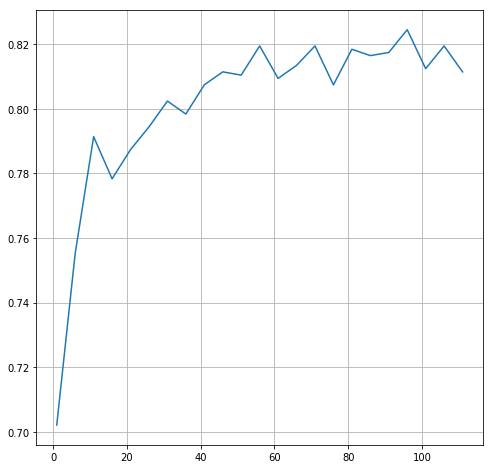

In [205]:
scores = list()
for n_estimator in range(1,112,5):
    tree = RandomForestClassifier(n_estimators=n_estimator)
    scores.append(cross_val_score(tree, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(range(1,112,5), scores)
plt.show

After 75 score doesn't increase very much. Set it on 75

<function matplotlib.pyplot.show(*args, **kw)>

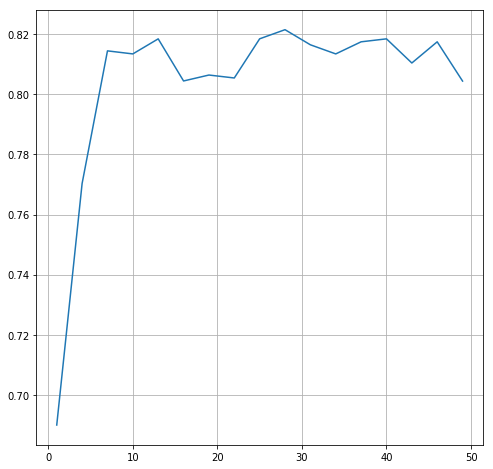

In [206]:
scores = list()
for depth in range(1,50,3):
    tree = RandomForestClassifier(n_estimators=75, max_depth=depth)
    scores.append(cross_val_score(tree, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(range(1, 50, 3), scores)
plt.show

After 10 score can increases, but it looks like overfitting, because of his decreasing after 18. Set it on 10.

Fitting min_samples_split and min_samples_leaf doesn't has any meaning, because we have small dataset.

So, our hyper parameteres for RandomForestClassifier is n_estimators=75, max_depth = 10

Now, lets fit hyper parameteres for AdaBoost

<function matplotlib.pyplot.show(*args, **kw)>

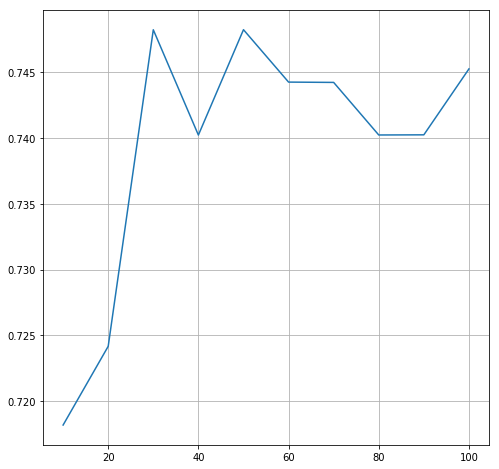

In [207]:
#let's change random_state
scores = list()
for n_estimator in range(10, 101, 10):
    ada = AdaBoostClassifier(n_estimators=n_estimator)
    scores.append(cross_val_score(ada, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(range(10, 101, 10), scores)
plt.show

After 30 score doesn't increase very much. Set it on 30

0.2
0.37222222222222223
0.5444444444444445
0.7166666666666666
0.8888888888888888
1.0611111111111111
1.2333333333333332
1.4055555555555554
1.5777777777777777
1.75


<function matplotlib.pyplot.show(*args, **kw)>

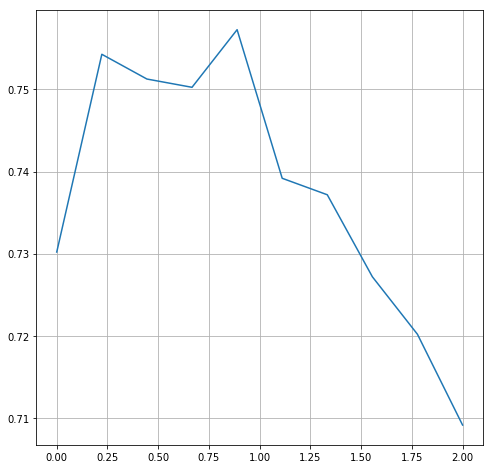

In [208]:
#let's change random_state
scores = list()
for lr in np.linspace(0.2, 1.75, num=10):
    print(lr)
    ada = AdaBoostClassifier(n_estimators=30, learning_rate=lr)
    scores.append(cross_val_score(ada, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(np.linspace(0.001, 2, num=10), scores)
plt.show

The best score shows us lr = 0.85. Set it on 0.85

So, our hyper parameteres for AdaBoostClassifier is n_estimators=30, learning_rate=0.85

Let's tune hyper parameteres for GradientBoostingClassifier

<function matplotlib.pyplot.show(*args, **kw)>

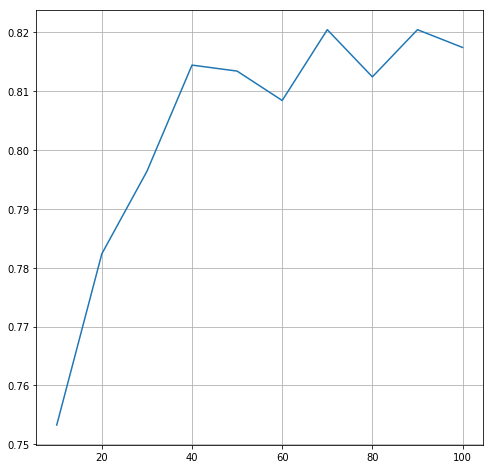

In [209]:
scores = list()
for n_estimator in range(10, 101, 10):
    GBC = GradientBoostingClassifier(n_estimators=n_estimator)
    scores.append(cross_val_score(GBC, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(range(10, 101, 10), scores)
plt.show

The best score shows us n_estimators = 70. Set it on 70.

0.2
0.37222222222222223
0.5444444444444445
0.7166666666666666
0.8888888888888888
1.0611111111111111
1.2333333333333332
1.4055555555555554
1.5777777777777777
1.75


<function matplotlib.pyplot.show(*args, **kw)>

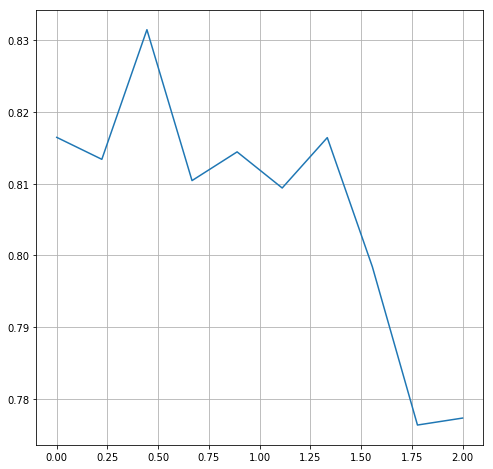

In [210]:
scores = list()
for lr in np.linspace(0.2, 1.75, num=10):
    print(lr)
    GBC = GradientBoostingClassifier(n_estimators=70, learning_rate=lr)
    scores.append(cross_val_score(GBC, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(np.linspace(0.001, 2, num=10), scores)
plt.show

The best score shows us lr = 0.5. Set it on 0.5

<function matplotlib.pyplot.show(*args, **kw)>

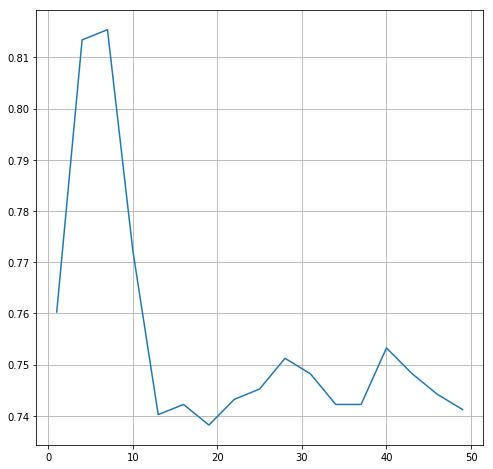

In [211]:
scores = list()
for depth in range(1,50,3):
    GBC = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=depth)
    scores.append(cross_val_score(GBC, df, target, cv=3).mean())
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(range(1, 50, 3), scores)
plt.show

The best score shows us max_depth = 8. Set it on 8

Fitting min_samples_split and min_samples_leaf doesn't has any meaning, because we have small dataset.

So, our hyper parameteres for AdaBoostClassifier is n_estimators=70, learning_rate=0.5, max_depth=8

In [248]:
#Lets check our models.
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.35, random_state=7)

tree =  RandomForestClassifier(n_estimators=75, max_depth = 10)
tree.fit(X_train, y_train)
print(f'RandomForestClassifier has {accuracy_score(y_test, tree.predict(X_test))}'
      f' and {f1_score(y_test, tree.predict(X_test))} f1_score')

ada =  AdaBoostClassifier(n_estimators=30, learning_rate=0.85)
ada.fit(X_train, y_train)
print(f'AdaBoostClassifier has {accuracy_score(y_test, ada.predict(X_test))}'
      f' and {f1_score(y_test, ada.predict(X_test))} f1_score')

GBC =  GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=8)
GBC.fit(X_train, y_train)
print(f'GradientBoostingClassifier has {accuracy_score(y_test, GBC.predict(X_test))} accuracy'
      f' and {f1_score(y_test, GBC.predict(X_test))} f1_score')

RandomForestClassifier has 0.7908309455587392 and 0.7932011331444758 f1_score
AdaBoostClassifier has 0.7191977077363897 and 0.7183908045977013 f1_score
GradientBoostingClassifier has 0.8194842406876791 accuracy and 0.8225352112676055 f1_score


The best score has GradientBoostingClassifier, but how do we know it learns slower, than RandomForestClassifier. 
So it will be wise to set it like the main model.

So. What we did in this work?

1. We find outliers in our dataset.
2. We find corrleation in 2 features.
3. We analize our features.
4. Fill Nan
5. We create new features for cetegorical features.
6. We tryed different models for calssification.
7. Set 3 best models and tune their hyper parameters.
8. We tryed defferent methods of prepearing categorical features and filling Nan.

What else can we do for our model?
1. tryed different prepearing continous features, like standratizing or normalization or scaling.
2. tryed ensemble of best models(taking their mode meanings)
3. If the data were bigger, we can tune another hyper parameters like min_samples_split and min_samples_leaf.

In [266]:
print(f'I worked on this project for {(time.time() - start_time)/3600} hours or {(time.time() - start_time)/3600 //1} hours and {(time.time() - start_time)/3600 %1 *0.6} minuts')

I worked on this project for 2.8275500839948653 hours or 2.0 hours and 0.49653005039691916 minuts
